# FIDE & Google Efficient Chess AI Challenge

In [1]:
# first let's make sure you have internet enabled
import requests
requests.get('http://www.google.com',timeout=10).ok

True

In [2]:
%%capture
# ensure we are on the latest version of kaggle-environments
!pip install --upgrade kaggle-environments

In [1]:
# set up the chess environment
from kaggle_environments import make
env = make("chess", debug=True)

c:\Users\USER\Desktop\Supahotfile\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


termcolor not installed, skipping dependency
No pygame installed, ignoring import


In [2]:
# Remove any existing build folder
!rm -rf build

# Create a new build folder
!mkdir -p build

# Clone the repository if not already present
!rm -rf fide-google-efficient-chess-ai-challenge
!git clone https://github.com/l2holV4l2u/fide-google-efficient-chess-ai-challenge.git

# Navigate to the build directory, configure with CMake, and build
!cd build && cmake ../fide-google-efficient-chess-ai-challenge/engine && make

'rm' is not recognized as an internal or external command,
operable program or batch file.
The syntax of the command is incorrect.


### Agent

In [4]:
%%writefile main.py
import subprocess
import os

class ChessEngine:
    def __init__(self, engine_path):
        # Check if the engine file exists
        if not os.path.exists(engine_path):
            raise FileNotFoundError(f"Engine file not found at {engine_path}")

        # Initialize the subprocess
        self.engine = subprocess.Popen(
            [engine_path],
            stdin=subprocess.PIPE,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )

    def _send_command(self, command):
        """Send a command to the chess engine."""
        if self.engine.stdin:
            self.engine.stdin.write(command + "\n")
            self.engine.stdin.flush()
        else:
            raise BrokenPipeError("Engine's stdin is not available.")

    def _read_output(self):
        """Read a single line of output from the chess engine."""
        if self.engine.stdout:
            return self.engine.stdout.readline().strip()
        return ""

    def get_best_move(self, fen, movetime=100):
        """Get the best move from the engine for a given FEN."""
        self._send_command(f"position fen {fen}")
        self._send_command(f"go movetime {movetime}")
        
        while True:
            output = self._read_output()
            if output.startswith("bestmove"):
                return output.split()[1]
        # Fallback if no move is found
        return "none"

    def stop(self):
        """Terminate the chess engine."""
        self._send_command("quit")
        self.engine.terminate()
        self.engine.wait()

# Path to the chess engine executable
engine_path = r'C:\Users\USER\Desktop\Supahotfile\fide-google-efficient-chess-ai-challenge\engine\main.exe'
engine = None

def chess_bot(obs):    
    """Chess bot function to interact with the engine."""
    global engine
    fen = obs.get('board', '')  # FEN string
    if not fen:
        raise ValueError("FEN string is missing in the observation.")

    if engine is None:
        engine = ChessEngine(engine_path)
    
    best_move = engine.get_best_move(fen)
    print(f"Best move: {best_move}")
    return best_move

Overwriting main.py


### Testing the agent

g1h3
b7b5
c2c3
b5b4
d1b3
a7a5
e2e3
a8a6
f1b5
b8c6
a2a4
h7h6
a1a3
f7f5
h3g1
g7g6
b3f7
e8f7
f2f3
c8b7
e3e4
g6g5
b5c4
f7g6
e1f1
b4c3
c4b3
h6h5
d2d4
c6e5
h2h3
d8c8
b3f7
g6h6
a3a2
e5f3
c1f4
c3c2
b2b4
f3d2
b1d2
a6a7
f7e6
a5b4
d2c4
b7c6
f1e2
c6a4
e2d3
a7a5
e4e5
c8a8
g2g4
c7c6
f4c1
a4b5
e6d5
c6d5
c1d2
a8e8
d2b4
e8g6
g4f5
h5h4
d3d2
h6h5
c4a3
d7d6
g1f3
b5e8
d2c2
a5a4
c2d2
g8f6
f5g6
f6g8
d2d1
a4a7
d1d2
h8h6
a3b1
d6e5
b4a5
a7d7
a2a1
d7d8
a1a3
e5e4
a5c3
e8a4
a3b3
d8a8
h1c1
h6h8
c1e1
h5g6
f3h4
h8h4
d2e2
g6h7
b1d2
g8f6
e2e3
h7h6
e1b1
a8d8
d2e4
d8a8
b1d1
a4c6
e4c5
h4d4
c5d3
f6g8
d1f1
d4g4
c3e5
g4e4
e3d2
g8f6
f1g1
a8a7
g1h1
e4e3
h1c1
c6b5
c1f1
f6e4
d2c2
a7a2
e5b2
a2a7
f1g1
e4c3
c2d2
e3d3
d2e1
a7a6
e1f2
e7e5
g1h1
e5e4
h1c1
c3a4
c1c5
a6f6
b2f6
e4e3
f2g1
d3c3
c5c4
c3d3
g1g2
b5a6
c4c7
d3c3
b3b4
a6c4
b4b3
h6h5
f6e7
c3b3
e7g5
b3b8
c7h7
h5g5
h7g7
g5f5
g7c7
f5g6
c7c6
f8d6
g2f3
g6f6
c6c4
f6e6
c4f4
d6e7
f4c4
b8c8
f3g3
e7f8
g3f3
c8c6
c4c3
a4c3
f3g2
f8d6
h3h4
c3b1
g2g1
d6g3
h4h5
g3f2
g1g2
c6c2
g2f3
c2c5
h5h6
e6f7



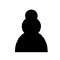
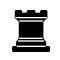
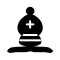
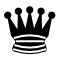
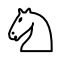
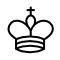
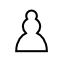
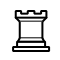
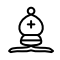
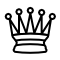
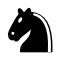
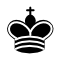

In [7]:
result = env.run(["main.py", "main.py"])
print("Agent exit status/reward/time left: ")
# look at the generated replay.json and print out the agent info
for agent in result[-1]:
    print("\t", agent.status, "/", agent.reward, "/", agent.observation.remainingOverageTime)
print("\n")
# render the game
env.render(mode="ipython", width=640, height=640) 